## Hackforge Python Demo - Windsor Traffic Open Data API & Python
\

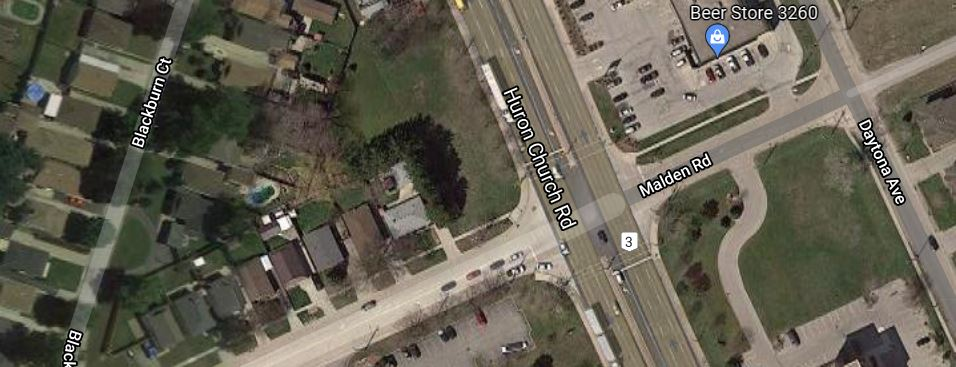

Read more about the API at:
https://opendata.citywindsor.ca/swagger/index.html 
  
Available Intersections:  
1: 'Dorchester Road and Huron Church Road'  
2: 'Totten Street and Huron Church Road'  
3: 'Malden Road and Huron Church Road'  

In [ ]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [ ]:
import pandas as pd
# import requests


# Construct the String for the API Call

intersection = input("Enter Intersection #:")
date = input("Enter Date (YYYY-MM-DD):")



In [ ]:
url = "https://opendata.citywindsor.ca/api/traffic?date="+str(date)+"&intersectionId="+str(intersection)+"&start_time=00:00&end_time=23:59"


df = pd.read_json(url)




In [ ]:
df[0:4]


In [ ]:
# Use Normalize to flatten the JSON attribute to Tabular form
# Note: You may get an error working outside of Google CoLab 

from pandas.io.json import json_normalize

df = pd.json_normalize(df['traffic'])

In [ ]:
df[0:15]

In [ ]:
df.vehicleType.unique()

In [ ]:
df.timeStamp.dtypes

In [ ]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [ ]:
df.head(10)

In [ ]:
df = df.drop(columns=['isDaylightSavingsTime'])

# Total Traffic for the Day


In [ ]:
df.qty.sum()

In [ ]:
df.groupby('vehicleType')['qty'].sum().sort_values(ascending=False)

# Charting

In [ ]:
# Load maplotplib library

import matplotlib.pyplot as plt

df.groupby('vehicleType')['qty'].sum().plot(kind='bar')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# chart

df.plot(kind='line',x='timeStamp',y='qty', color='teal')
plt.title = ('Vehicles Per Minute')
plt.ylabel('Number of Vehicles')
plt.show()

In [ ]:
# Chart - Per Hour Traffic
df.groupby(pd.Grouper(key='timeStamp', axis=0, 
                      freq='H', sort=True)).sum().plot(kind='bar')
plt.show()

In [ ]:
# Create a 4 hour list by type of vehicle.
type_by_hour = df.groupby([pd.Grouper(key='timeStamp', freq='4H'), 'vehicleType']).qty.sum()

In [ ]:
type_by_hour[0:50]

**How did these events affect local traffic?** ❓

Traffic Incident (9/11/2021):
https://blackburnnews.com/windsor/windsor-news/2021/09/11/crash-involving-police-cruiser-snarls-traffic-huron-church/

COVID-19 Lockdown Orders March 23, 2020